In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Reddit_Data.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[8277, 13142, 15830]


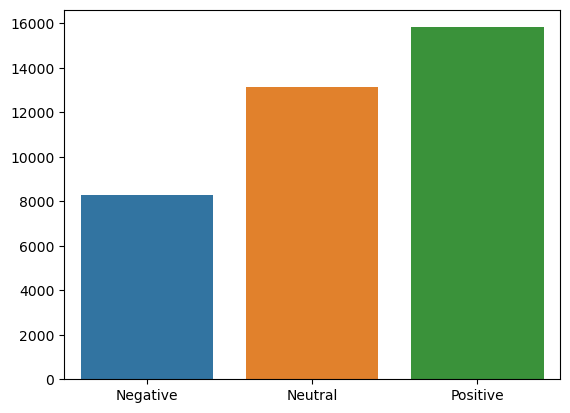

In [4]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [5]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.dropna(inplace=True)
print(df.isnull().sum())

clean_comment    0
category         0
dtype: int64


In [7]:
df.describe(include='all')

,clean_comment,category
count,36799,36799.000000
unique,36799,NaN
top,family mormon have never tried explain them t...,NaN
freq,1,NaN
mean,NaN,0.204381
std,NaN,0.781670
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [8]:
df.rename({'clean_comment':'clean_text'}, axis=1, inplace=True)
df.head()


,clean_text,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  36799 non-null  object
 1   category    36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB


In [10]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

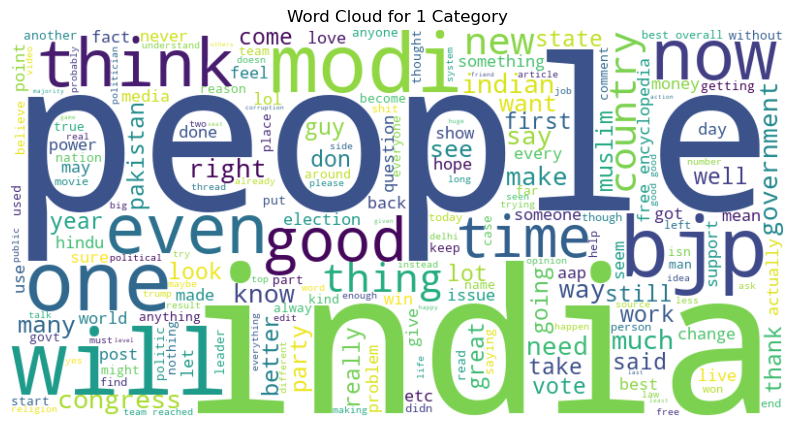

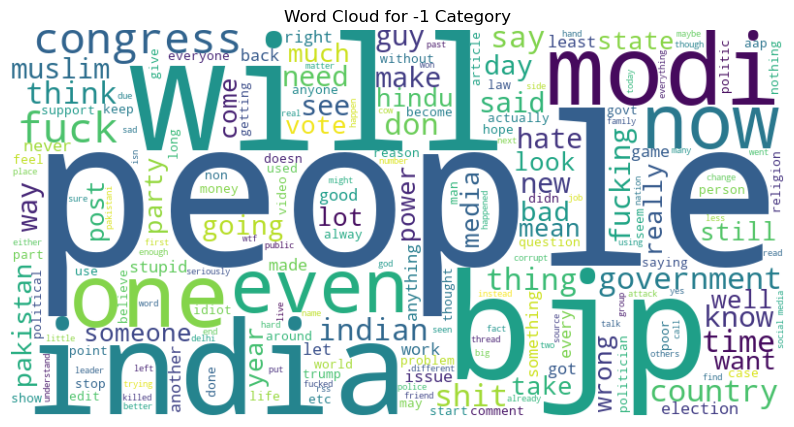

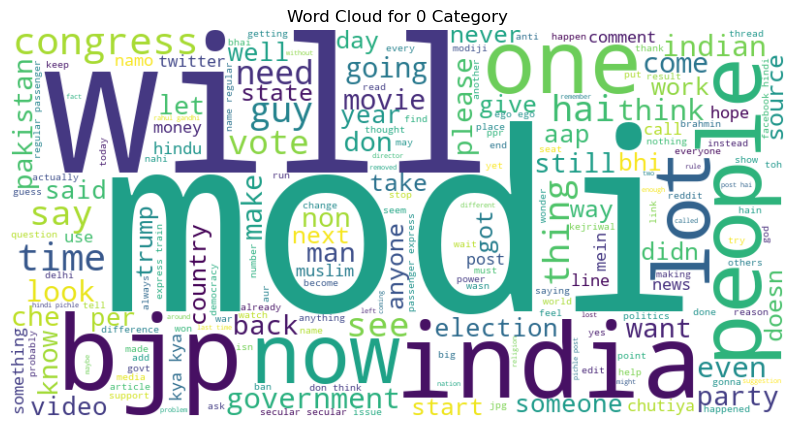

In [11]:
categories = df['category'].unique()
for category in categories:
    text = " ".join(df[df['category'] == category]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category} Category')
    plt.axis("off")
    plt.show()


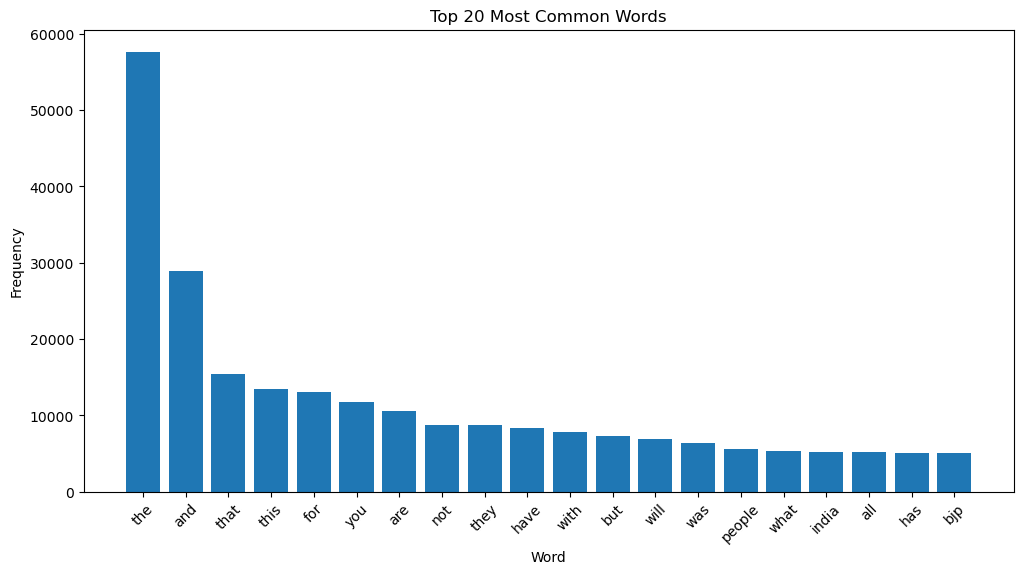

In [12]:
# Calculating Word Frequency 
all_text = " ".join(df['clean_text'])
words = all_text.split()
word_counts = Counter(words)
stopwords = set(STOPWORDS)
top_words = word_counts.most_common(20)
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


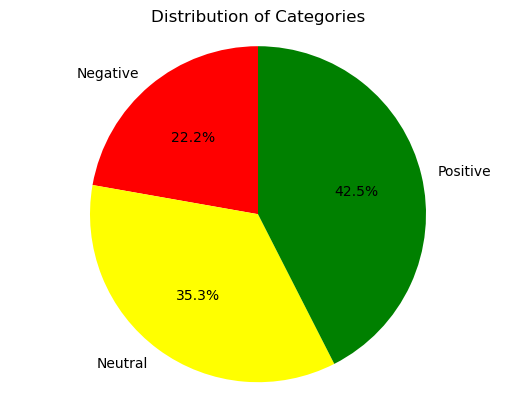

In [13]:
colors = ['red', 'yellow', 'green']
plt.pie(pp, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Categories')

plt.show()

In [14]:
comment=list(df.clean_text.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))
print(list(reddit_dict.items())[:5])

[(' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ', 1), ('buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke 

In [15]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)    
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ', 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss '] 
 ['what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ', 'jesus was zen meets jew '] 
 [' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness e

In [16]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [17]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [18]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

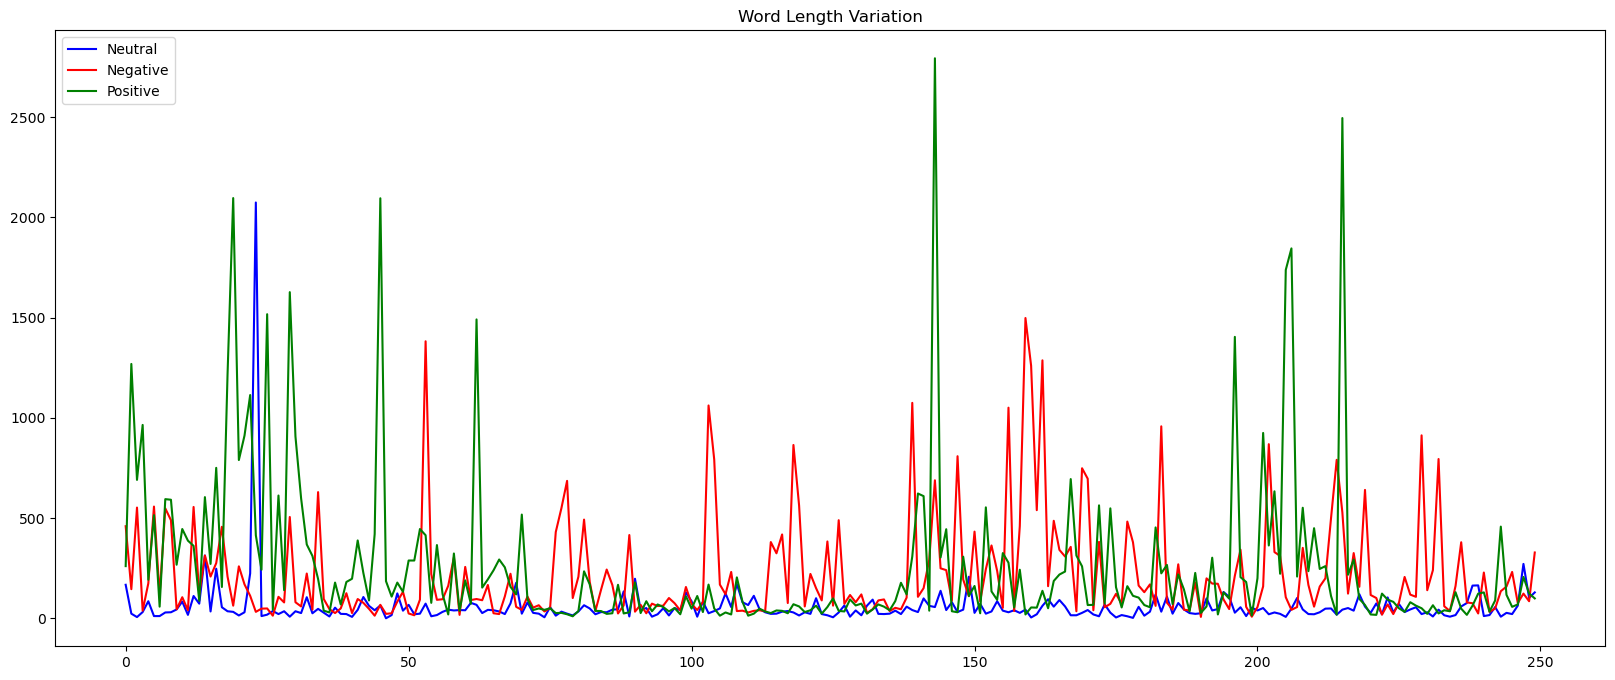

In [19]:
plt.subplots(figsize=(20,8))
plt.title("Word Length Variation")
plt.plot(Neutral_len[:250],c='b',label='Neutral')
plt.plot(neg_len[:250],c='r',label='Negative')
plt.plot(pos_len[:250],c='g',label='Positive')
plt.legend(loc='upper left')
plt.show()

In [20]:
pos_mean=sum(pos_len)//len(pos_len)
neg_mean=sum(neg_len)//len(neg_len)
neutral_mean=sum(Neutral_len)//len(Neutral_len)
combined_mean=(sum(pos_len)+sum(neg_len)+sum(Neutral_len))//(len(pos_len)+len(neg_len)+len(Neutral_len))

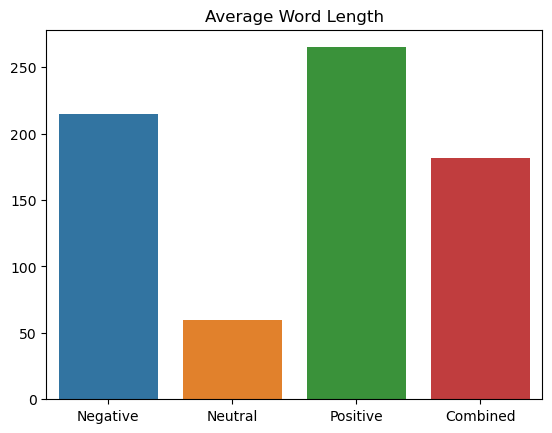

In [21]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

In [22]:
X=df['clean_text'].astype('str')
X[:5]

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_text, dtype: object

In [23]:
lp=""
for i in X:
    lp+=i+" "
print(lp[:100])

 family mormon have never tried explain them they still stare puzzled from time time like some kind 


In [24]:
st=lp.split(' ')
dict_len=len(set(st))

In [25]:
dict_len,len(st)

(55543, 1133437)

In [26]:
#from tokenizers import Tokenizer
#tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
#tokenizer.fit_on_texts(X)
#len(tokenizer.word_index)

In [ ]:
#!pip install tokenizers

In [26]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)
len(tokenizer.word_index)

54720

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

In [28]:
X_train[:2]

[[254,
  27333,
  11,
  123,
  642,
  871,
  40,
  10,
  95,
  12289,
  16325,
  24,
  54,
  54,
  22,
  43,
  292,
  4162,
  14008,
  7559,
  10,
  11,
  129,
  3149,
  6,
  2,
  5392,
  19932,
  11056,
  6435,
  3,
  4415,
  11,
  1437,
  19,
  2,
  112,
  1518,
  8048],
 [1518,
  20,
  78,
  73,
  83,
  7124,
  12,
  2848,
  457,
  1143,
  4,
  7125,
  3,
  1708,
  8,
  383,
  2,
  45,
  93,
  1708,
  1853,
  2983,
  112,
  961,
  91,
  88,
  26,
  191,
  112,
  2,
  202,
  79,
  1320,
  5,
  36,
  263,
  2983,
  112,
  4,
  39,
  19933,
  12,
  304,
  14,
  3,
  2983,
  112,
  4,
  19933,
  13,
  182,
  2,
  2849,
  2379,
  1518,
  120,
  60,
  246,
  715,
  304,
  19,
  5182,
  14,
  3,
  19934,
  1406,
  1468,
  8,
  2428,
  11,
  31,
  102,
  4286,
  28,
  363,
  13,
  17,
  26,
  190,
  285,
  76,
  92,
  1468,
  198,
  304,
  6436,
  11057,
  3,
  1518,
  304,
  79,
  891,
  6436,
  1144,
  281,
  36,
  60,
  228,
  1519,
  2,
  112,
  2379,
  87,
  3,
  67,
  33,
  882,
  20,

In [29]:
df['category']=df['category'].replace({-1:2})

In [30]:
mp={0:"Neutral",1:"Positve",2:"Negative"}

In [31]:
Y=df['category'].values

In [32]:
from tensorflow.keras.utils import to_categorical
Y_hot=to_categorical(Y)
print(Y_hot[:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2509
           1       0.90      0.90      0.90      3200
           2       0.88      0.74      0.80      1651

    accuracy                           0.89      7360
   macro avg       0.89      0.87      0.88      7360
weighted avg       0.89      0.89      0.89      7360



Confusion Matrix:
 [[2455   34   20]
 [ 160 2890  150]
 [ 153  276 1222]]


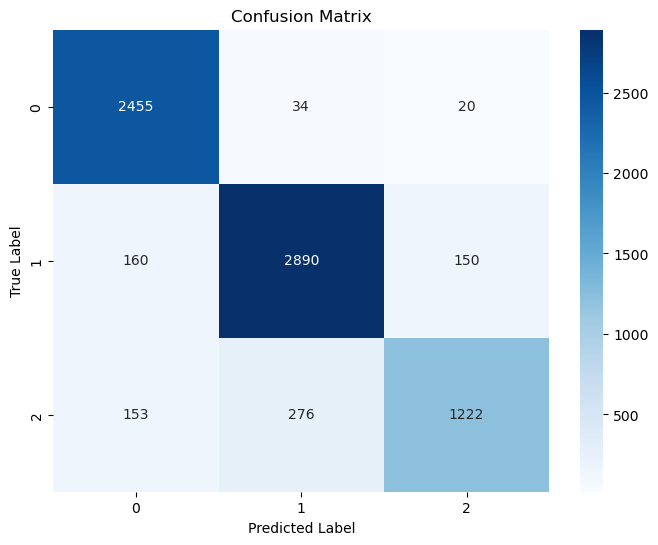

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Display classification report
print("Logistic Regression Classification Report:\n", classification_report(Y_test, Y_pred_logreg))

Logistic Regression Accuracy: 0.87
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2509
           1       0.89      0.89      0.89      3200
           2       0.90      0.70      0.79      1651

    accuracy                           0.87      7360
   macro avg       0.88      0.85      0.86      7360
weighted avg       0.88      0.87      0.87      7360



Confusion Matrix:
 [[2404   84   21]
 [ 227 2862  111]
 [ 206  287 1158]]


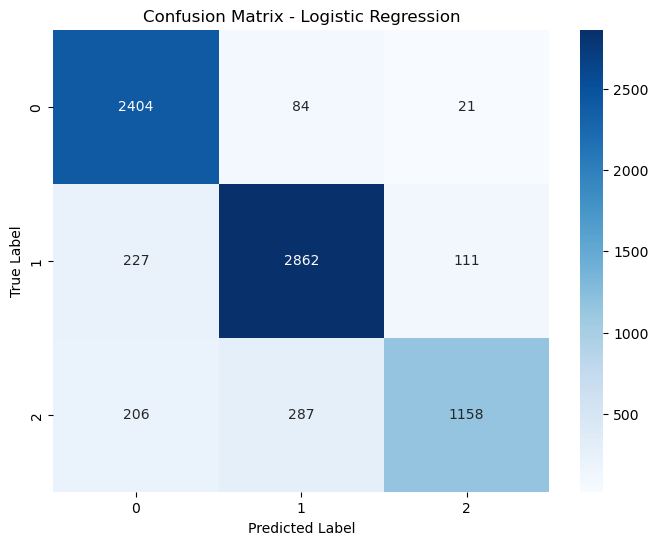

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(Y_test, Y_pred_logreg)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [38]:
from sklearn.neighbors import KNeighborsClassifier

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred_knn = knn_model.predict(X_test_tfidf)

# Evaluate the KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Display classification report
print("KNN Classification Report:\n", classification_report(Y_test, Y_pred_knn))

KNN Accuracy: 0.38
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.98      0.52      2509
           1       0.84      0.08      0.15      3200
           2       0.84      0.05      0.09      1651

    accuracy                           0.38      7360
   macro avg       0.68      0.37      0.25      7360
weighted avg       0.68      0.38      0.26      7360



In [39]:
from sklearn.tree import DecisionTreeClassifier

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred_dt = dt_model.predict(X_test_tfidf)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Display classification report
print("Decision Tree Classification Report:\n", classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.75
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.83      2509
           1       0.77      0.76      0.76      3200
           2       0.59      0.54      0.56      1651

    accuracy                           0.75      7360
   macro avg       0.72      0.72      0.72      7360
weighted avg       0.74      0.75      0.74      7360



In [40]:
from sklearn.naive_bayes import MultinomialNB

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build Naive Bayes model (Multinomial Naive Bayes for text classification)
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Display classification report
print("Naive Bayes Classification Report:\n", classification_report(Y_test, Y_pred_nb))

Naive Bayes Accuracy: 0.66
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.52      0.64      2509
           1       0.58      0.94      0.72      3200
           2       0.91      0.31      0.46      1651

    accuracy                           0.66      7360
   macro avg       0.77      0.59      0.60      7360
weighted avg       0.74      0.66      0.63      7360



In [41]:
from sklearn.ensemble import RandomForestClassifier

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, Y_train)

# Predictions
Y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Display classification report
print("Random Forest Classification Report:\n", classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.77
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      2509
           1       0.73      0.90      0.80      3200
           2       0.89      0.33      0.49      1651

    accuracy                           0.77      7360
   macro avg       0.81      0.71      0.71      7360
weighted avg       0.79      0.77      0.75      7360



In [36]:
def predict(s, tfidf_vectorizer, model, mp):
    X_tes = []
    X_tes.append(s)
    
    # Transform the input using the TF-IDF vectorizer
    X_test_tfidf = tfidf_vectorizer.transform(X_tes)
    
    # Predict probabilities using the logistic regression model
    prob_scores = model.predict_proba(X_test_tfidf)
    
    # Find the class with the highest probability
    sent = int(np.argmax(prob_scores))
    
    # Map the predicted sentiment to the corresponding label
    predicted_sentiment = mp[sent]
    
    print("The Predicted Sentiment is:", predicted_sentiment)


In [37]:
# Example usage
pol = "The article is good but its not great. Moreover, I would say you have done a decent job."
predict(pol, tfidf_vectorizer, logreg_model, mp)

The Predicted Sentiment is: Positve


In [38]:
lop="You have done a stupid mistake which made you lose all the progress you made"
predict(lop,tfidf_vectorizer,logreg_model,mp)

The Predicted Sentiment is: Negative


In [39]:
ppp="Lets Find out what this is going to be classified as"
predict(ppp,tfidf_vectorizer,logreg_model,mp)

The Predicted Sentiment is: Neutral


In [40]:
com="It aint hard work but its  work"
predict(com,tfidf_vectorizer,logreg_model,mp)

The Predicted Sentiment is: Negative


In [42]:
!pip install tabulate


In [43]:
from tabulate import tabulate
from sklearn.metrics import precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Assuming you have already trained and defined these models
models = {
    'SVM': svm_model,
    'Logistic Regression': logreg_model,
    'KNN': knn_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

# Assuming you have X_train, Y_train, X_test, Y_test available
results = []
for model_name, model in models.items():
    # Train predictions
    Y_train_pred = model.predict(X_train_tfidf)
    train_precision = precision_score(Y_train, Y_train_pred, average='weighted')
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Test predictions
    Y_test_pred = model.predict(X_test_tfidf)
    test_precision = precision_score(Y_test, Y_test_pred, average='weighted')
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    results.append([model_name, train_precision, test_precision, train_accuracy, test_accuracy])
# Create a table using tabulate
table_headers = ["Model", "Train Precision", "Test Precision", "Train Accuracy", "Test Accuracy"]
table = tabulate(results, headers=table_headers, tablefmt='grid')

# Print the table
print(table)

+---------------------+-------------------+------------------+------------------+-----------------+
| Model               |   Train Precision |   Test Precision |   Train Accuracy |   Test Accuracy |
+=====================+===================+==================+==================+=================+
| SVM                 |          0.936748 |         0.891937 |         0.936479 |        0.892255 |
+---------------------+-------------------+------------------+------------------+-----------------+
| Logistic Regression |          0.92403  |         0.875123 |         0.922654 |        0.872826 |
+---------------------+-------------------+------------------+------------------+-----------------+
| KNN                 |          0.735248 |         0.676796 |         0.422671 |        0.381114 |
+---------------------+-------------------+------------------+------------------+-----------------+
| Random Forest       |          0.998645 |         0.791067 |         0.998641 |        0.770652 |


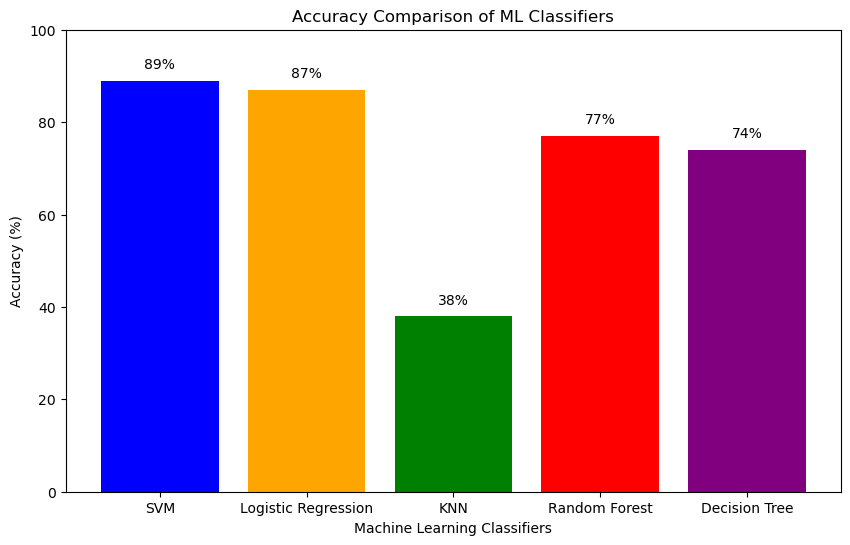

In [15]:
import matplotlib.pyplot as plt

# Data
algorithms = ['SVM', 'Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']
accuracies = [89, 87, 38, 77, 74]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Machine Learning Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of ML Classifiers')
plt.ylim(0, 100)

# Display the percentages on top of the bars
for i, value in enumerate(accuracies):
    plt.text(i, value + 2, f'{value}%', ha='center', va='bottom')

plt.show()